In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer
#from gluonnlp.data import SentencepieceTokenizer
#From Window, the latest mxnet version is 1.50. While the real latest version is 1.7.0. So, there seems problems when activate codes.

In [2]:
DATA_IN_PATH = './data_in/KOR'
TRAIN_STS_DF = os.path.join(DATA_IN_PATH, 'KorSTS', 'sts-train.tsv')
train_data = pd.read_csv(TRAIN_STS_DF, sep='\t', quoting = 3)
train_data.head(10)

,genre,filename,year,id,score,sentence1,sentence2
0,main-captions,MSRvid,2012test,1,5.00,비행기가 이륙하고 있다.,비행기가 이륙하고 있다.
1,main-captions,MSRvid,2012test,4,3.80,한 남자가 큰 플루트를 연주하고 있다.,남자가 플루트를 연주하고 있다.
2,main-captions,MSRvid,2012test,5,3.80,한 남자가 피자에 치즈를 뿌려놓고 있다.,한 남자가 구운 피자에 치즈 조각을 뿌려놓고 있다.
3,main-captions,MSRvid,2012test,6,2.60,세 남자가 체스를 하고 있다.,두 남자가 체스를 하고 있다.
4,main-captions,MSRvid,2012test,9,4.25,한 남자가 첼로를 연주하고 있다.,자리에 앉은 남자가 첼로를 연주하고 있다.
5,main-captions,MSRvid,2012test,11,4.25,몇몇 남자들이 싸우고 있다.,두 남자가 싸우고 있다.
6,main-captions,MSRvid,2012test,12,0.50,남자가 담배를 피우고 있다.,남자가 스케이트를 타고 있다.
7,main-captions,MSRvid,2012test,13,1.60,남자가 피아노를 치고 있다.,남자가 기타를 연주하고 있다.
8,main-captions,MSRvid,2012test,14,2.20,한 남자가 기타를 치고 노래를 부르고 있다.,한 여성이 어쿠스틱 기타를 연주하고 노래를 부르고 있다.
9,main-captions,MSRvid,2012test,16,5.00,사람이 고양이를 천장에 던지고 있다.,사람이 고양이를 천장에 던진다.


In [3]:
print('전체 train_data 개수: {}'.format(len(train_data)))

전체 train_data 개수: 5749


In [4]:
train_set = pd.Series(train_data['sentence1'].tolist() + train_data['sentence2'].tolist()).astype(str)
train_set.head()

0             비행기가 이륙하고 있다.
1     한 남자가 큰 플루트를 연주하고 있다.
2    한 남자가 피자에 치즈를 뿌려놓고 있다.
3          세 남자가 체스를 하고 있다.
4        한 남자가 첼로를 연주하고 있다.
dtype: object

In [5]:
print('전체 문장 데이터의 개수: {}'.format(len(train_set)))

전체 문장 데이터의 개수: 11498


In [6]:
print('유일한 총 문장 수 : {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 문장의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

유일한 총 문장 수 : 10383
반복해서 나타나는 문장의 수: 716


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number of sentence')

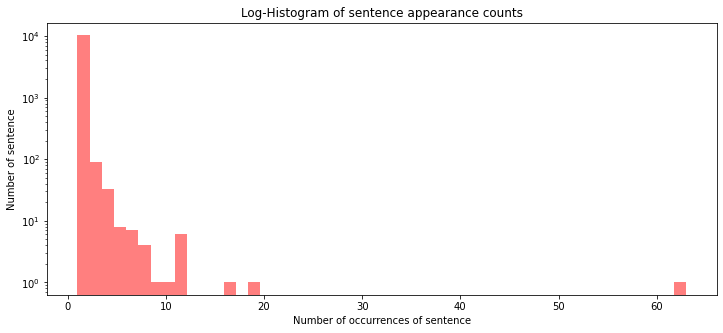

In [7]:
plt.figure(figsize=(12, 5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of sentence appearance counts')
plt.xlabel('Number of occurrences of sentence')
plt.ylabel('Number of sentence')

In [8]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))

print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))

print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 63
중복 최소 개수: 1
중복 평균 개수: 1.11
중복 표준편차: 0.81
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x251c2d04fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x251c2ca4e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x251c2d048c8>],
 'medians': [<matplotlib.lines.Line2D at 0x251c2d01308>],
 'fliers': [<matplotlib.lines.Line2D at 0x251c2d08908>],
 'means': [<matplotlib.lines.Line2D at 0x251c2d01508>]}

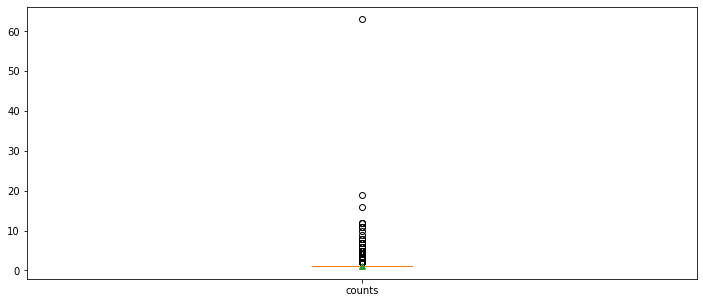

In [9]:
plt.figure(figsize=(12, 5))

plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

In [10]:
train_length = train_set.apply(len)

Text(0, 0.5, 'Probability')

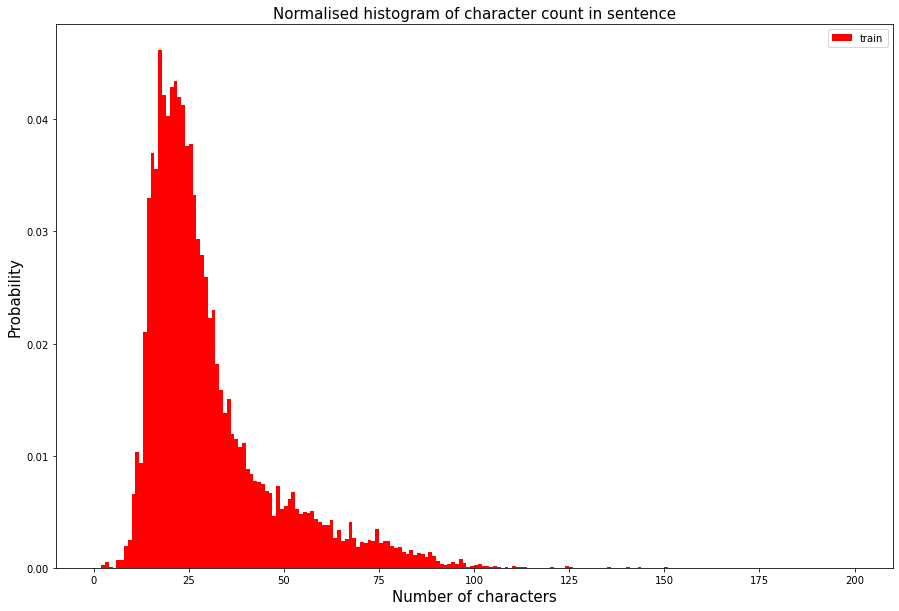

In [11]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Normalised histogram of character count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [12]:
print('문장 길이 최대 값: {}'.format(np.max(train_length)))
print('문장 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문장 길이 중간 값: {}'.format(np.median(train_length)))
print('문장 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('문장 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

문장 길이 최대 값: 150
문장 길이 평균 값: 29.80
문장 길이 표준편차: 16.76
문장 길이 중간 값: 25.0
문장 길이 제 1 사분위: 19.0
문장 길이 제 3 사분위: 35.0


{'whiskers': [<matplotlib.lines.Line2D at 0x251c33d0908>,
 'caps': [<matplotlib.lines.Line2D at 0x251c33d2f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x251c33d2748>],
 'medians': [<matplotlib.lines.Line2D at 0x251c33d5d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x251c33f5b48>],
 'means': [<matplotlib.lines.Line2D at 0x251c33f5ac8>]}

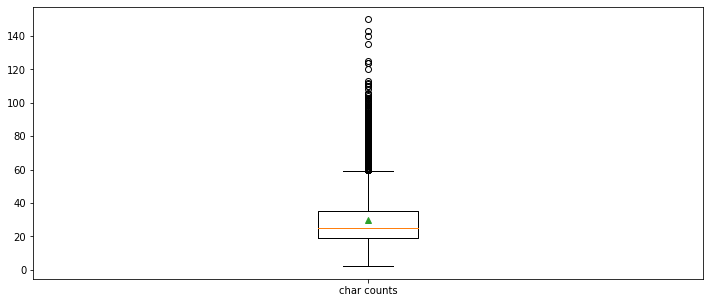

In [13]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)

In [14]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Prabability')

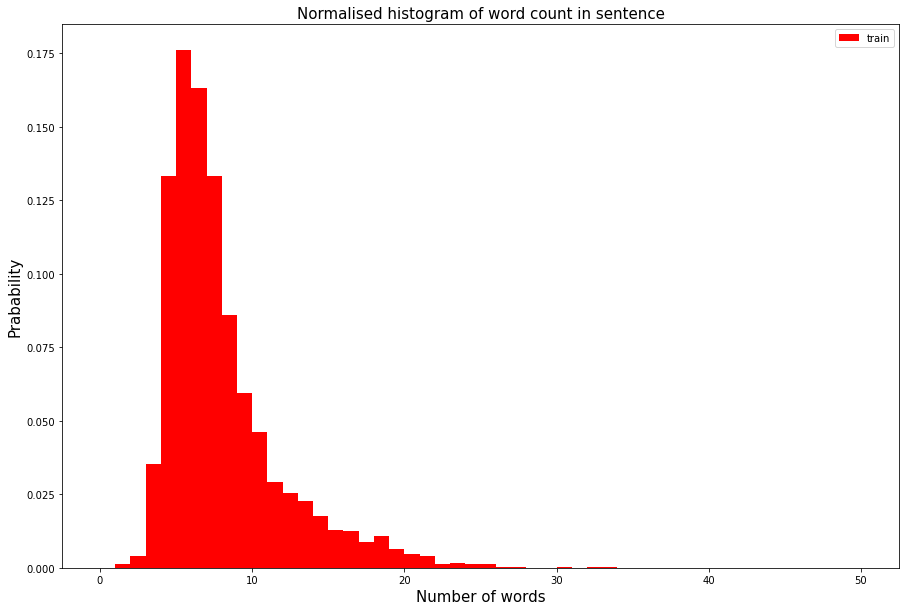

In [15]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of word count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

In [16]:
print('문장 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('문장 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('문장 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('문장 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('문장 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('문장 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('문장 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

문장 단어 개수 최대 값: 33
문장 단어 개수 평균 값: 7.50
문장 단어 개수 표준편차: 3.84
문장 단어 개수 중간 값: 6.0
문장 단어 개수 제 1 사분위: 5.0
문장 단어 개수 제 3 사분위: 9.0
문장 단어 개수 99 퍼센트: 21.0


{'whiskers': [<matplotlib.lines.Line2D at 0x251c2eb80c8>,
 'caps': [<matplotlib.lines.Line2D at 0x251c2f9f248>,
 'boxes': [<matplotlib.lines.Line2D at 0x251c2f3a848>],
 'medians': [<matplotlib.lines.Line2D at 0x251c3002188>],
 'fliers': [<matplotlib.lines.Line2D at 0x251c304a488>],
 'means': [<matplotlib.lines.Line2D at 0x251c30422c8>]}

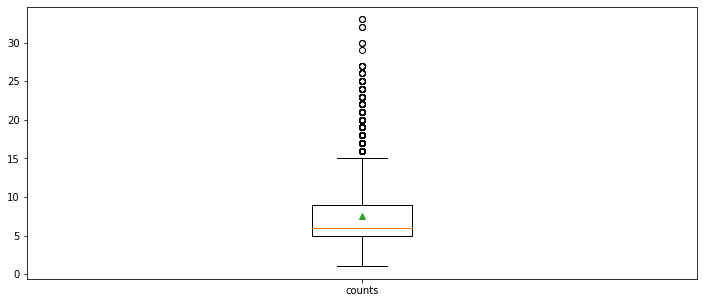

In [17]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [18]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) 
math = np.mean(train_set.apply(lambda x: '[math]' in x)) 
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) 
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) 
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) 

In [19]:
print('물음표가있는 문장: {:.2f}%'.format(qmarks * 100))
print('마침표를 포함한 문장: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 문장: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 문장: {:.2f}%'.format(capitals * 100))
print('숫자가있는 문장: {:.2f}%'.format(numbers * 100))

물음표가있는 문장: 1.81%
마침표를 포함한 문장: 70.13%
첫 글자가 대문자 인 문장: 1.84%
대문자가있는 문장: 5.84%
숫자가있는 문장: 19.33%


In [20]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased', do_lower_case=True)

In [21]:
train_bert_token_counts = train_set.apply(lambda x:len(tokenizer.tokenize(x)))

Text(0, 0.5, 'Prabability')

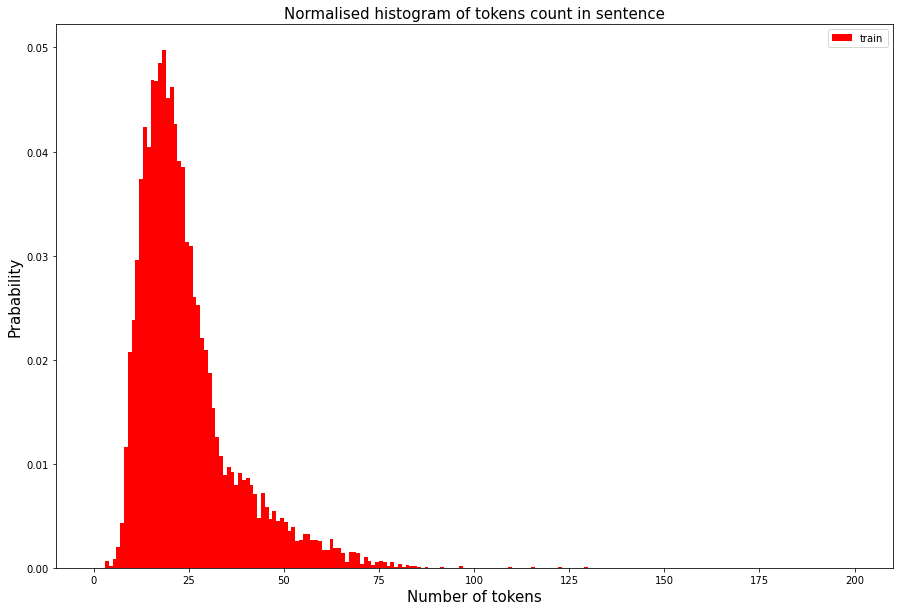

In [22]:
plt.figure(figsize=(15, 10))
plt.hist(train_bert_token_counts, bins=200, range=[0, 200], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of tokens count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

In [23]:
print('문장 tokens 개수 최대 값: {}'.format(np.max(train_bert_token_counts)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(train_bert_token_counts)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(train_bert_token_counts)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(train_bert_token_counts)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(train_bert_token_counts, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(train_bert_token_counts, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(train_bert_token_counts, 99)))

문장 tokens 개수 최대 값: 129
문장 tokens 개수 평균 값: 23.84
문장 tokens 개수 표준편차: 12.68
문장 tokens 개수 중간 값: 21.0
문장 tokens 개수 제 1 사분위: 15.0
문장 tokens 개수 제 3 사분위: 28.0
문장 tokens 개수 99 퍼센트: 67.0


{'whiskers': [<matplotlib.lines.Line2D at 0x251c33262c8>,
 'caps': [<matplotlib.lines.Line2D at 0x251c332bf48>,
 'boxes': [<matplotlib.lines.Line2D at 0x251c332ba88>],
 'medians': [<matplotlib.lines.Line2D at 0x251c332db48>],
 'fliers': [<matplotlib.lines.Line2D at 0x251c332ed88>],
 'means': [<matplotlib.lines.Line2D at 0x251c332ed48>]}

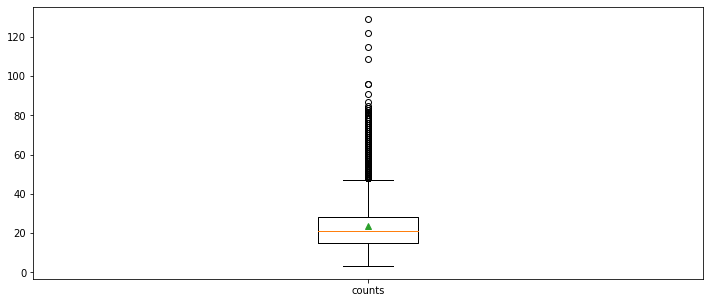

In [24]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_bert_token_counts,
             labels=['counts'],
             showmeans=True)

In [25]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)

In [26]:
train_bert_token_cased_counts = train_set.apply(lambda x:len(tokenizer.tokenize(x)))

Text(0, 0.5, 'Prabability')

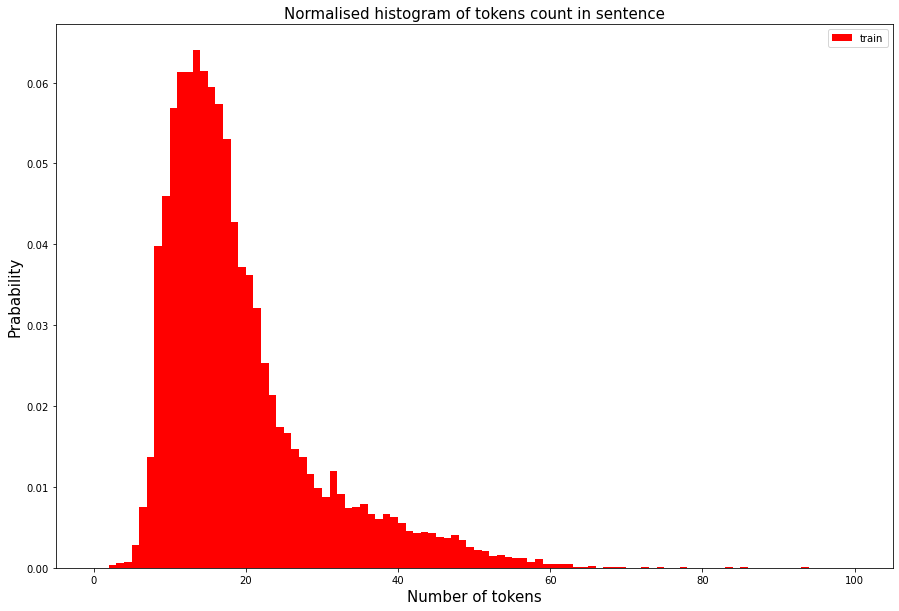

In [27]:
plt.figure(figsize=(15, 10))
plt.hist(train_bert_token_cased_counts, bins=100, range=[0, 100], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of tokens count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

In [28]:
print('문장 tokens 개수 최대 값: {}'.format(np.max(train_bert_token_cased_counts)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(train_bert_token_cased_counts)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(train_bert_token_cased_counts)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(train_bert_token_cased_counts)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(train_bert_token_cased_counts, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(train_bert_token_cased_counts, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(train_bert_token_cased_counts, 99)))

문장 tokens 개수 최대 값: 102
문장 tokens 개수 평균 값: 18.74
문장 tokens 개수 표준편차: 10.12
문장 tokens 개수 중간 값: 16.0
문장 tokens 개수 제 1 사분위: 12.0
문장 tokens 개수 제 3 사분위: 22.0
문장 tokens 개수 99 퍼센트: 53.0


{'whiskers': [<matplotlib.lines.Line2D at 0x251c56d0c88>,
 'caps': [<matplotlib.lines.Line2D at 0x251c56c2ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x251c56c2508>],
 'medians': [<matplotlib.lines.Line2D at 0x251c3853c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x251c3853d88>],
 'means': [<matplotlib.lines.Line2D at 0x251c3853cc8>]}

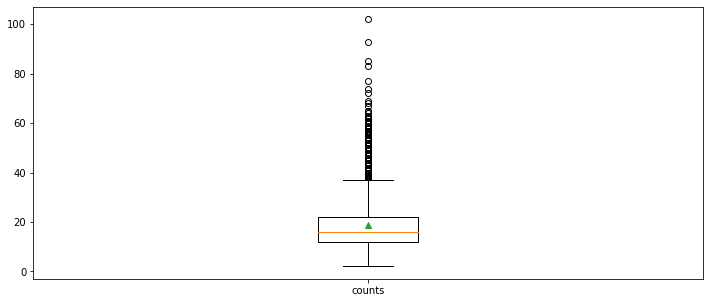

In [29]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_bert_token_cased_counts,
             labels=['counts'],
             showmeans=True)

In [30]:
#TOKENIZER_PATH = './gpt_ckpt/gpt2_kor_tokenizer.spiece'

#tokenizer = SentencepieceTokenizer(TOKENIZER_PATH)

In [31]:
#train_sentencepeice_counts = train_set.apply(lambda x:len(tokenizer(x)))

In [32]:
# plt.figure(figsize=(15, 10))
# plt.hist(train_sentencepeice_counts, bins=100, range=[0, 100], facecolor='r', density=True, label='train')
# plt.title('Normalised histogram of tokens count in sentence', fontsize=15)
# plt.legend()
# plt.xlabel('Number of tokens', fontsize=15)
# plt.ylabel('Prabability', fontsize=15)

In [33]:
# print('문장 tokens 개수 최대 값: {}'.format(np.max(train_sentencepeice_counts)))
# print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(train_sentencepeice_counts)))
# print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(train_sentencepeice_counts)))
# print('문장 tokens 개수 중간 값: {}'.format(np.median(train_sentencepeice_counts)))
# print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(train_sentencepeice_counts, 25)))
# print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(train_sentencepeice_counts, 75)))
# print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(train_sentencepeice_counts, 99)))

In [34]:
# plt.figure(figsize=(12, 5))

# plt.boxplot(train_sentencepeice_counts,
#              labels=['counts'],
#              showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

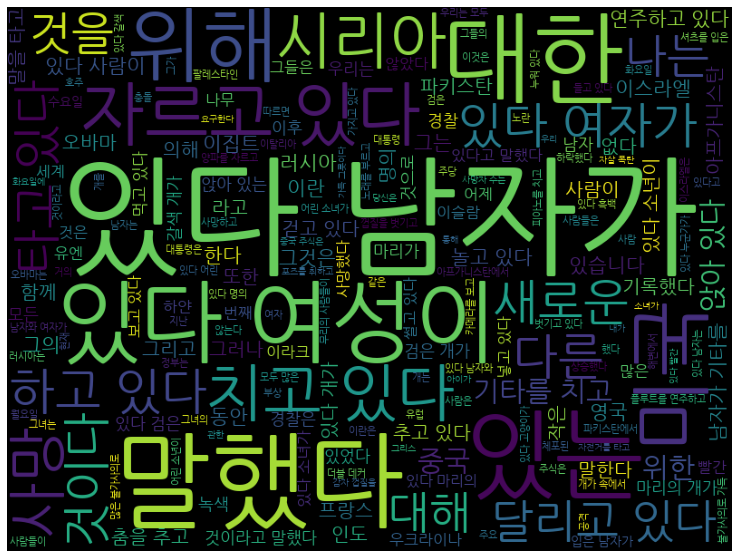

In [35]:
from wordcloud import WordCloud

font_path = os.path.join(DATA_IN_PATH, 'NanumGothic.ttf')
cloud = WordCloud(font_path = font_path, width=800, height=600).generate(" ".join(train_set.astype(str)))

plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

<AxesSubplot:>

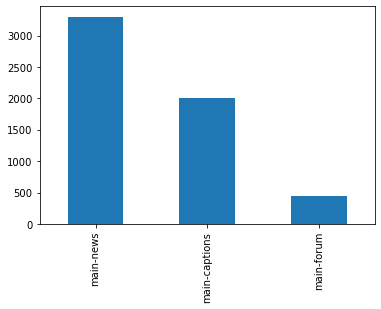

In [36]:
train_data.genre.value_counts().plot(kind='bar')

<AxesSubplot:>

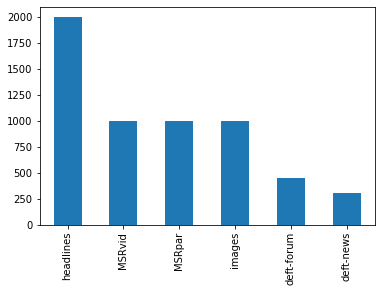

In [37]:
train_data.filename.value_counts().plot(kind='bar')

<AxesSubplot:>

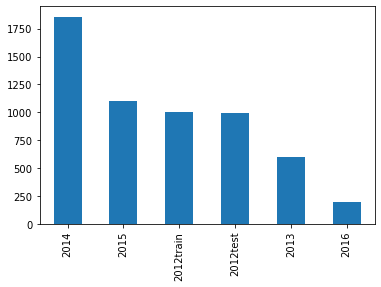

In [38]:
train_data.year.value_counts().plot(kind='bar')

<AxesSubplot:>

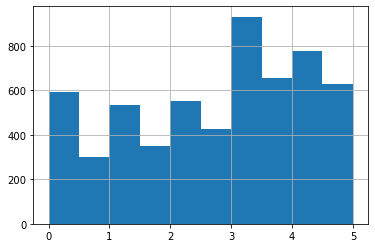

In [39]:
train_data.score.hist()